## Notebook Goal
Confirm if histogram matching settings are optimized after registration.

### Library Imports

In [1]:
%%time
# Standard Library Imports
import os

# Third Party Imports
import ants
import tifffile
import numpy as np

# Local Imports
from clearex.plot.images import mips
from clearex.plot.data import histograms_fast
from clearex.stats.intensity import compare_intensity


CPU times: user 12.3 s, sys: 1.57 s, total: 13.9 s
Wall time: 24.8 s


### Data Paths

In [2]:
%%time
moving_path = ("/archive/bioinformatics/Danuser_lab/Dean/dean/2025-05-28-registration/original_moving")
reference_path = ("/archive/bioinformatics/Danuser_lab/Dean/dean/2025-05-28-registration/original_fixed")
transform_path = ("/archive/bioinformatics/Danuser_lab/Dean/dean/2025-05-28-registration/tmpnccx3xyy0GenericAffine.mat")


CPU times: user 19 μs, sys: 0 ns, total: 19 μs
Wall time: 37.4 μs


### Import Data and Plot Maximum Intensity Projections

In [3]:
%%time
file = "1_CH01_000000.tif"
fixed_image = tifffile.imread(str(os.path.join(reference_path, file)))
moving_image = tifffile.imread(str(os.path.join(moving_path, file)))

CPU times: user 2.72 s, sys: 7.74 s, total: 10.5 s
Wall time: 1min 24s


### Plot Maximum Intensity Projections

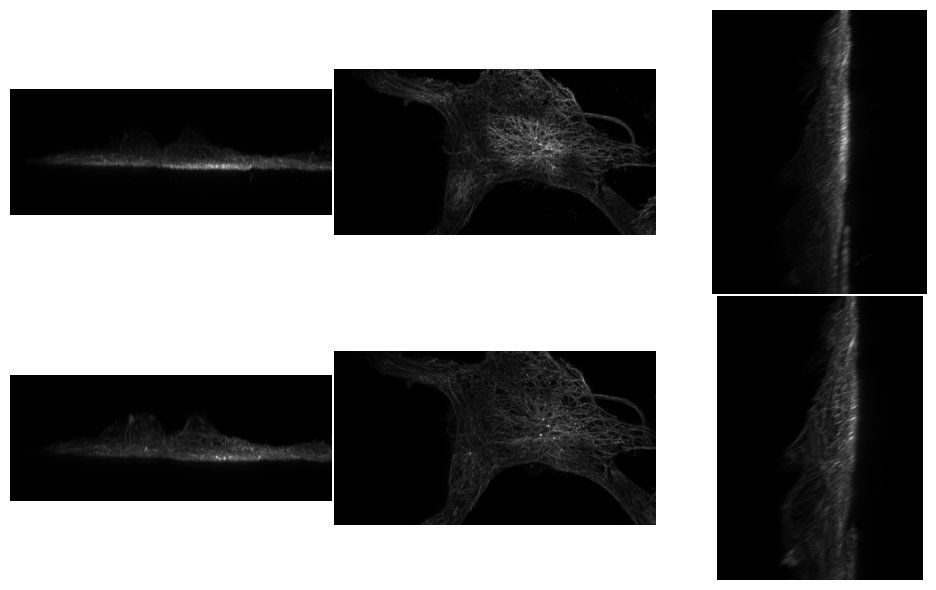

In [4]:
mips(fixed_image, moving_image)

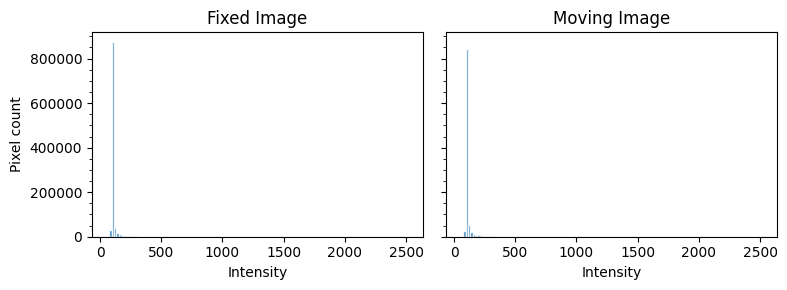

In [10]:
histograms_fast(fixed_image, moving_image, bins=128, labels=("Fixed Image", "Moving Image"), sample=1_000_000)

### Convert to Ants images.

In [ ]:
%%time
fixed_image = ants.from_numpy(fixed_image)
moving_image = ants.from_numpy(moving_image)


### Apply transformation and iteratively evaluate correspondence between intensity distributions

In [ ]:
transform_list = [transform_path]

registered_image = ants.apply_transforms(
    fixed=fixed_image,
    moving=moving_image,
    transformlist=transform_list,
    interpolator="linear")

for match_points in [64, 128, 256, 512, 1024, 2048]:
    histogram_matched_image = ants.histogram_match_image(
        source_image=registered_image,
        reference_image=fixed_image,
        number_of_match_points=match_points,
        use_threshold_at_mean_intensity=True
    )
    print(f"\nHistogram-match points: {match_points}")
    compare_intensity(histogram_matched_image.numpy().astype(np.uint16),
                        fixed_image.numpy().astype(np.uint16),
                        max_sample=50_000,
                        use_hist_wasserstein=True)

## Conclusion
Thus far, default histogram matching approach seems to deliver the same results.